Parameters of the model
alpha_1 :  [ 1.02606012 -1.65867761 -1.59898905]
alpha_2 :  [-2.86412348  5.18229469  5.33224785]
beta :  [-2.37861643 -3.08767672  8.79077462]
MSE errors for training and test samples in the last epoch :  0.0007131470986437332 0.000637681542722134


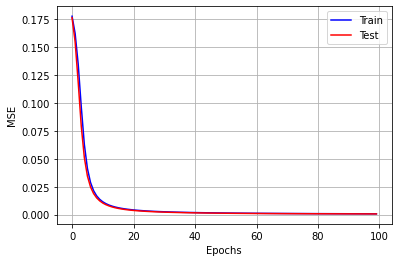

MSE for the training samples converges to zero indicating that model is trained ideally and perfectly predicts the training data set. MSE for test data also converges to 0 showing that the model has been trained appropriately.


In [1]:
########################################################
# OR operator
########################################################

import numpy as np
from matplotlib import pyplot as plt

# Generating samples
T = 1000
# Training samples = 0.8T
# Testing/Validation samples = 0.2T
N = 4*T//5
M = T//5
# Generate four clusters from 2-D gaussian distribution 
# This is done to add mild gaussian noice to the inputs x (binary digits)
mean1 = [0,0]
cov1 = 0.01*np.identity(2)
x = np.random.multivariate_normal(mean1, cov1, T//4).T 

mean2 = [1,0]
cov2 = 0.01*np.identity(2)
x = np.concatenate((x,np.random.multivariate_normal(mean2, cov2, T//4).T),axis=1)

mean3 = [0,1]
cov3 = 0.01*np.identity(2)
x = np.concatenate((x,np.random.multivariate_normal(mean3, cov3, T//4).T),axis=1)

mean4 = [1,1]
cov4 = 0.01*np.identity(2)
x = np.concatenate((x,np.random.multivariate_normal(mean4, cov4, T//4).T),axis=1)

# Assign labels for the input samples
# (0,0) -> 0
# (0,1) -> 1
# (1,0) -> 1
# (1,1) -> 1
y = np.concatenate((np.zeros(T//4),np.ones(3*T//4)), axis=0)
x = np.concatenate((x,[y]),axis=0)

# Shuffle the samples and split into train and test samples

np.random.shuffle(x.T)

train_x = np.array([x[0,:N], x[1,:N]])
train_y = x[2,:N]

test_x = [x[0,N:], x[1,N:]]
test_y = x[2,N:]

# Define functions sigmoid and derivative of sigmoid
def sigmoid(x):
  return 1/(1 + np.exp(-x))

def sigmoid_diff(x):
  return sigmoid(x) * (1 - sigmoid(x))

# Give the batch-size - m and learning rate - gamme
m = 50
gamma = 0.05

# Intialize weights to some random numbers
alpha_1 = np.random.rand(3)
alpha_2 = np.random.rand(3)
beta = np.random.rand(3)

# Re-initializing weights incase of any weight assigned a value 0
while (np.all(alpha_2) == 0):
  alpha_2 = np.random.rand(3)
while (np.all(alpha_1) == 0):
  alpha_1 = np.random.rand(3)
while (np.all(beta) == 0):
  beta = np.random.rand(3)

# Defining functions for vectors x, z and output y
# Train and test vectors are defined separately
# X = [1,
#      x1,
#      x2]
def vector_x(i):
  return np.array([1,
                  train_x[0][i],
                  train_x[1][i]])
  
def vector_test_x(i):
  return np.array([1,
                  test_x[0][i],
                  test_x[1][i]])

# z_i = sigmoid(alpha_1_transpose.X)
# Z = [1,
#      z1,
#      z2]
def vector_z(i):
  return np.array([1,
                 sigmoid(np.dot(alpha_1.T, vector_x(i))),
                 sigmoid(np.dot(alpha_2.T, vector_x(i)))])
  
def vector_test_z(i):
  return np.array([1,
                 sigmoid(np.dot(alpha_1.T, vector_test_x(i))),
                 sigmoid(np.dot(alpha_2.T, vector_test_x(i)))])

# y = sigmoid(beta_transpose.Z)
def output_y(i):
  return sigmoid(np.dot(beta.T,vector_z(i)))

def output_test_y(i):
  return sigmoid(np.dot(beta.T,vector_test_z(i)))

# Intialize null arrays for MSE train and test
MSE_error = np.zeros(100)
MSE_test_error = np.zeros(100)

# Backpropogation
# Updation of weights is as follows
# alpha_1(r+1) = alpha_1(r) + 2*gamma*(y-y_hat)*sigmoid_diff(beta_transpose.Z)*beta_1*sigmoid_diff(alpha_1_transpose.X)*X
# alpha_2(r+1) = alpha_2(r) + 2*gamma*(y-y_hat)*sigmoid_diff(beta_transpose.Z)*beta_2*sigmoid_diff(alpha_2_transpose.X)*X
# beta(r+1) = beta(r) + 2*gamma*(y-y_hat)*sigmoid_diff(beta_transpose.Z)*Z

# Run 100 epochs
for k in range(100):
  # Partition the training set into mini batches of size m
  for j in range(N//m):
    dB = da_1 = da_2 = np.zeros(3)
    # Calculate gradients and also the MSE error ( = (y - y_hat)^2 )
    for i in range(m*j, (j+1)*m):
      dB = dB + (2*gamma*(train_y[i] - output_y(i)) * sigmoid_diff(np.dot(beta.T, vector_z(i)))) * vector_z(i)
      da_1 = da_1 + (2*gamma*(train_y[i] - output_y(i)) * sigmoid_diff(np.dot(beta.T, vector_z(i))) * beta[1] * sigmoid_diff(np.dot(alpha_1.T, vector_x(i)))) * vector_x(i)
      da_2 = da_2 + (2*gamma*(train_y[i] - output_y(i)) * sigmoid_diff(np.dot(beta.T, vector_z(i))) * beta[2] * sigmoid_diff(np.dot(alpha_2.T, vector_x(i)))) * vector_x(i)        
      MSE_error[k] += (train_y[i] - output_y(i))**2
    # Update weights
    beta = beta + dB
    alpha_1 = alpha_1 + da_1
    alpha_2 = alpha_2 + da_2
  # Calculate MSE error for test samples
  for l in range(M):
    MSE_test_error[k] += (test_y[l] - output_test_y(l))**2

MSE_error = MSE_error/N
MSE_test_error = MSE_test_error/M

print('Parameters of the model')
print('alpha_1 : ',alpha_1)
print('alpha_2 : ',alpha_2)
print('beta : ' ,beta)
print('MSE errors for training and test samples in the last epoch : ', MSE_error[99],MSE_test_error[99])

# Plot MSE errors for train and test samples
plt.plot(np.arange(100),MSE_error,'b',label='Train' )
plt.plot(np.arange(100),MSE_test_error,'r',label='Test')
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend(loc='best')
plt.show()

# Print observations
print('MSE for the training samples converges to zero indicating that model is trained ideally and perfectly predicts the training data set. MSE for test data also converges to 0 showing that the model has been trained appropriately.')

Parameters of the model
alpha_1 :  [-1.93715053  3.4909969   3.51654585]
alpha_2 :  [-2.71847086  5.1241438   5.57442358]
beta :  [-5.67118984  4.49163935  8.04839576]
MSE errors for training and test samples in the last epoch :  0.000338852675456093 0.00014393319717716826


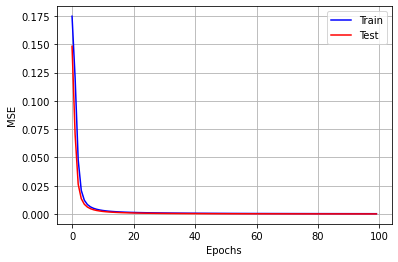

MSE for the training samples converges to zero indicating that model is trained ideally and perfectly predicts the training data set. MSE for test data also converges to 0 showing that the model has been trained appropriately.


In [2]:
########################################################
# OR operator
########################################################

import numpy as np
from matplotlib import pyplot as plt

# Generating samples
T = 2500
# Training samples = 0.8T
# Testing/Validation samples = 0.2T
N = 4*T//5
M = T//5
# Generate four clusters from 2-D gaussian distribution 
# This is done to add mild gaussian noice to the inputs x (binary digits)
mean1 = [0,0]
cov1 = 0.01*np.identity(2)
x = np.random.multivariate_normal(mean1, cov1, T//4).T 

mean2 = [1,0]
cov2 = 0.01*np.identity(2)
x = np.concatenate((x,np.random.multivariate_normal(mean2, cov2, T//4).T),axis=1)

mean3 = [0,1]
cov3 = 0.01*np.identity(2)
x = np.concatenate((x,np.random.multivariate_normal(mean3, cov3, T//4).T),axis=1)

mean4 = [1,1]
cov4 = 0.01*np.identity(2)
x = np.concatenate((x,np.random.multivariate_normal(mean4, cov4, T//4).T),axis=1)

# Assign labels for the input samples
# (0,0) -> 0
# (0,1) -> 1
# (1,0) -> 1
# (1,1) -> 1
y = np.concatenate((np.zeros(T//4),np.ones(3*T//4)), axis=0)
x = np.concatenate((x,[y]),axis=0)

# Shuffle the samples and split into train and test samples

np.random.shuffle(x.T)

train_x = np.array([x[0,:N], x[1,:N]])
train_y = x[2,:N]

test_x = [x[0,N:], x[1,N:]]
test_y = x[2,N:]

# Define functions sigmoid and derivative of sigmoid
def sigmoid(x):
  return 1/(1 + np.exp(-x))

def sigmoid_diff(x):
  return sigmoid(x) * (1 - sigmoid(x))

# Give the batch-size - m and learning rate - gamme
m = 50
gamma = 0.05

# Intialize weights to some random numbers
alpha_1 = np.random.rand(3)
alpha_2 = np.random.rand(3)
beta = np.random.rand(3)

# Re-initializing weights incase of any weight assigned a value 0
while (np.all(alpha_2) == 0):
  alpha_2 = np.random.rand(3)
while (np.all(alpha_1) == 0):
  alpha_1 = np.random.rand(3)
while (np.all(beta) == 0):
  beta = np.random.rand(3)

# Defining functions for vectors x, z and output y
# Train and test vectors are defined separately
# X = [1,
#      x1,
#      x2]
def vector_x(i):
  return np.array([1,
                  train_x[0][i],
                  train_x[1][i]])
  
def vector_test_x(i):
  return np.array([1,
                  test_x[0][i],
                  test_x[1][i]])

# z_i = sigmoid(alpha_1_transpose.X)
# Z = [1,
#      z1,
#      z2]
def vector_z(i):
  return np.array([1,
                 sigmoid(np.dot(alpha_1.T, vector_x(i))),
                 sigmoid(np.dot(alpha_2.T, vector_x(i)))])
  
def vector_test_z(i):
  return np.array([1,
                 sigmoid(np.dot(alpha_1.T, vector_test_x(i))),
                 sigmoid(np.dot(alpha_2.T, vector_test_x(i)))])

# y = sigmoid(beta_transpose.Z)
def output_y(i):
  return sigmoid(np.dot(beta.T,vector_z(i)))

def output_test_y(i):
  return sigmoid(np.dot(beta.T,vector_test_z(i)))

# Intialize null arrays for MSE train and test
MSE_error = np.zeros(100)
MSE_test_error = np.zeros(100)

# Backpropogation
# Updation of weights is as follows
# alpha_1(r+1) = alpha_1(r) + 2*gamma*(y-y_hat)*sigmoid_diff(beta_transpose.Z)*beta_1*sigmoid_diff(alpha_1_transpose.X)*X
# alpha_2(r+1) = alpha_2(r) + 2*gamma*(y-y_hat)*sigmoid_diff(beta_transpose.Z)*beta_2*sigmoid_diff(alpha_2_transpose.X)*X
# beta(r+1) = beta(r) + 2*gamma*(y-y_hat)*sigmoid_diff(beta_transpose.Z)*Z

# Run 100 epochs
for k in range(100):
  # Partition the training set into mini batches of size m
  for j in range(N//m):
    dB = da_1 = da_2 = np.zeros(3)
    # Calculate gradients and also the MSE error ( = (y - y_hat)^2 )
    for i in range(m*j, (j+1)*m):
      dB = dB + (2*gamma*(train_y[i] - output_y(i)) * sigmoid_diff(np.dot(beta.T, vector_z(i)))) * vector_z(i)
      da_1 = da_1 + (2*gamma*(train_y[i] - output_y(i)) * sigmoid_diff(np.dot(beta.T, vector_z(i))) * beta[1] * sigmoid_diff(np.dot(alpha_1.T, vector_x(i)))) * vector_x(i)
      da_2 = da_2 + (2*gamma*(train_y[i] - output_y(i)) * sigmoid_diff(np.dot(beta.T, vector_z(i))) * beta[2] * sigmoid_diff(np.dot(alpha_2.T, vector_x(i)))) * vector_x(i)        
      MSE_error[k] += (train_y[i] - output_y(i))**2
    # Update weights
    beta = beta + dB
    alpha_1 = alpha_1 + da_1
    alpha_2 = alpha_2 + da_2
  # Calculate MSE error for test samples
  for l in range(M):
    MSE_test_error[k] += (test_y[l] - output_test_y(l))**2

MSE_error = MSE_error/N
MSE_test_error = MSE_test_error/M

print('Parameters of the model')
print('alpha_1 : ',alpha_1)
print('alpha_2 : ',alpha_2)
print('beta : ' ,beta)
print('MSE errors for training and test samples in the last epoch : ', MSE_error[99],MSE_test_error[99])

# Plot MSE errors for train and test samples
plt.plot(np.arange(100),MSE_error,'b',label='Train' )
plt.plot(np.arange(100),MSE_test_error,'r',label='Test')
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend(loc='best')
plt.show()

# Print observations
print('MSE for the training samples converges to zero indicating that model is trained ideally and perfectly predicts the training data set. MSE for test data also converges to 0 showing that the model has been trained appropriately.')

Parameters of the model
alpha_1 :  [-2.17633902  4.312286    4.17132996]
alpha_2 :  [-2.73601278  5.736744    5.59657646]
beta :  [-6.30508397  5.530022    8.17709333]
MSE errors for training and test samples in the last epoch :  0.00026902844212038044 0.0004784756326777927


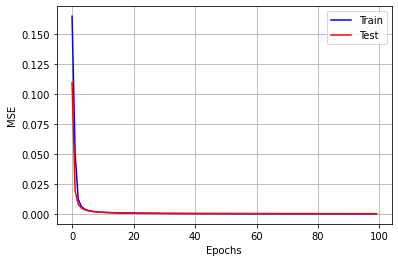

MSE for the training samples converges to zero indicating that model is trained ideally and perfectly predicts the training data set. MSE for test data also converges to 0 showing that the model has been trained appropriately.


In [3]:
########################################################
# OR operator
########################################################

import numpy as np
from matplotlib import pyplot as plt

# Generating samples
T = 5000
# Training samples = 0.8T
# Testing/Validation samples = 0.2T
N = 4*T//5
M = T//5
# Generate four clusters from 2-D gaussian distribution 
# This is done to add mild gaussian noice to the inputs x (binary digits)
mean1 = [0,0]
cov1 = 0.01*np.identity(2)
x = np.random.multivariate_normal(mean1, cov1, T//4).T 

mean2 = [1,0]
cov2 = 0.01*np.identity(2)
x = np.concatenate((x,np.random.multivariate_normal(mean2, cov2, T//4).T),axis=1)

mean3 = [0,1]
cov3 = 0.01*np.identity(2)
x = np.concatenate((x,np.random.multivariate_normal(mean3, cov3, T//4).T),axis=1)

mean4 = [1,1]
cov4 = 0.01*np.identity(2)
x = np.concatenate((x,np.random.multivariate_normal(mean4, cov4, T//4).T),axis=1)

# Assign labels for the input samples
# (0,0) -> 0
# (0,1) -> 1
# (1,0) -> 1
# (1,1) -> 1
y = np.concatenate((np.zeros(T//4),np.ones(3*T//4)), axis=0)
x = np.concatenate((x,[y]),axis=0)

# Shuffle the samples and split into train and test samples

np.random.shuffle(x.T)

train_x = np.array([x[0,:N], x[1,:N]])
train_y = x[2,:N]

test_x = [x[0,N:], x[1,N:]]
test_y = x[2,N:]

# Define functions sigmoid and derivative of sigmoid
def sigmoid(x):
  return 1/(1 + np.exp(-x))

def sigmoid_diff(x):
  return sigmoid(x) * (1 - sigmoid(x))

# Give the batch-size - m and learning rate - gamme
m = 50
gamma = 0.05

# Intialize weights to some random numbers
alpha_1 = np.random.rand(3)
alpha_2 = np.random.rand(3)
beta = np.random.rand(3)

# Re-initializing weights incase of any weight assigned a value 0
while (np.all(alpha_2) == 0):
  alpha_2 = np.random.rand(3)
while (np.all(alpha_1) == 0):
  alpha_1 = np.random.rand(3)
while (np.all(beta) == 0):
  beta = np.random.rand(3)

# Defining functions for vectors x, z and output y
# Train and test vectors are defined separately
# X = [1,
#      x1,
#      x2]
def vector_x(i):
  return np.array([1,
                  train_x[0][i],
                  train_x[1][i]])
  
def vector_test_x(i):
  return np.array([1,
                  test_x[0][i],
                  test_x[1][i]])

# z_i = sigmoid(alpha_1_transpose.X)
# Z = [1,
#      z1,
#      z2]
def vector_z(i):
  return np.array([1,
                 sigmoid(np.dot(alpha_1.T, vector_x(i))),
                 sigmoid(np.dot(alpha_2.T, vector_x(i)))])
  
def vector_test_z(i):
  return np.array([1,
                 sigmoid(np.dot(alpha_1.T, vector_test_x(i))),
                 sigmoid(np.dot(alpha_2.T, vector_test_x(i)))])

# y = sigmoid(beta_transpose.Z)
def output_y(i):
  return sigmoid(np.dot(beta.T,vector_z(i)))

def output_test_y(i):
  return sigmoid(np.dot(beta.T,vector_test_z(i)))

# Intialize null arrays for MSE train and test
MSE_error = np.zeros(100)
MSE_test_error = np.zeros(100)

# Backpropogation
# Updation of weights is as follows
# alpha_1(r+1) = alpha_1(r) + 2*gamma*(y-y_hat)*sigmoid_diff(beta_transpose.Z)*beta_1*sigmoid_diff(alpha_1_transpose.X)*X
# alpha_2(r+1) = alpha_2(r) + 2*gamma*(y-y_hat)*sigmoid_diff(beta_transpose.Z)*beta_2*sigmoid_diff(alpha_2_transpose.X)*X
# beta(r+1) = beta(r) + 2*gamma*(y-y_hat)*sigmoid_diff(beta_transpose.Z)*Z

# Run 100 epochs
for k in range(100):
  # Partition the training set into mini batches of size m
  for j in range(N//m):
    dB = da_1 = da_2 = np.zeros(3)
    # Calculate gradients and also the MSE error ( = (y - y_hat)^2 )
    for i in range(m*j, (j+1)*m):
      dB = dB + (2*gamma*(train_y[i] - output_y(i)) * sigmoid_diff(np.dot(beta.T, vector_z(i)))) * vector_z(i)
      da_1 = da_1 + (2*gamma*(train_y[i] - output_y(i)) * sigmoid_diff(np.dot(beta.T, vector_z(i))) * beta[1] * sigmoid_diff(np.dot(alpha_1.T, vector_x(i)))) * vector_x(i)
      da_2 = da_2 + (2*gamma*(train_y[i] - output_y(i)) * sigmoid_diff(np.dot(beta.T, vector_z(i))) * beta[2] * sigmoid_diff(np.dot(alpha_2.T, vector_x(i)))) * vector_x(i)        
      MSE_error[k] += (train_y[i] - output_y(i))**2
    # Update weights
    beta = beta + dB
    alpha_1 = alpha_1 + da_1
    alpha_2 = alpha_2 + da_2
  # Calculate MSE error for test samples
  for l in range(M):
    MSE_test_error[k] += (test_y[l] - output_test_y(l))**2

MSE_error = MSE_error/N
MSE_test_error = MSE_test_error/M

print('Parameters of the model')
print('alpha_1 : ',alpha_1)
print('alpha_2 : ',alpha_2)
print('beta : ' ,beta)
print('MSE errors for training and test samples in the last epoch : ', MSE_error[99],MSE_test_error[99])

# Plot MSE errors for train and test samples
plt.plot(np.arange(100),MSE_error,'b',label='Train' )
plt.plot(np.arange(100),MSE_test_error,'r',label='Test')
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend(loc='best')
plt.show()

# Print observations
print('MSE for the training samples converges to zero indicating that model is trained ideally and perfectly predicts the training data set. MSE for test data also converges to 0 showing that the model has been trained appropriately.')